# Advertising Dataset

Importing the Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the Dataset:

In [6]:
hp = pd.read_csv(r'C:\Users\user\Desktop\advertising.csv')

In [7]:
hp.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
hp.shape

(200, 4)

Data Analysis

In [10]:
print(pd.isnull(df).sum())

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [11]:
hp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [115]:
plt.rcParams['figure.figsize']=(18,6)

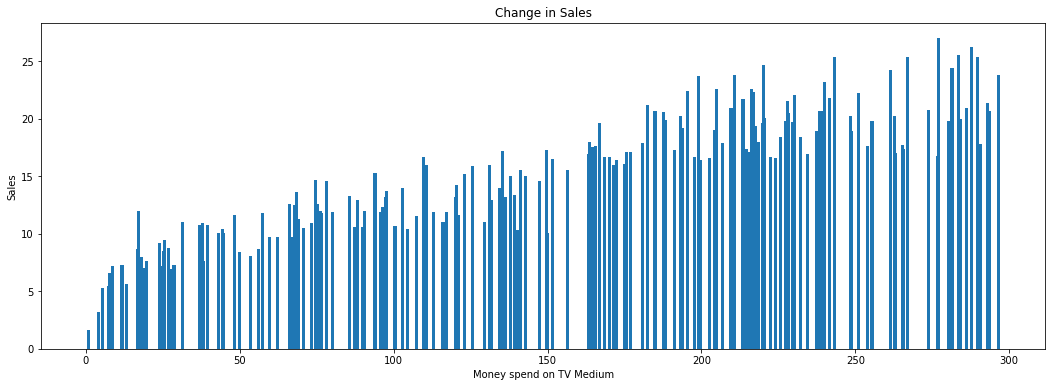

In [116]:
# get money spend
medium = hp['TV'].values
# get the sales 
sales = hp['Sales'].values

# Label the axes
plt.xlabel('Money spend on TV Medium')
plt.ylabel('Sales')

#label the figure
plt.title('Change in Sales')

# create

plt.bar(medium,sales,width=1)
plt.show()

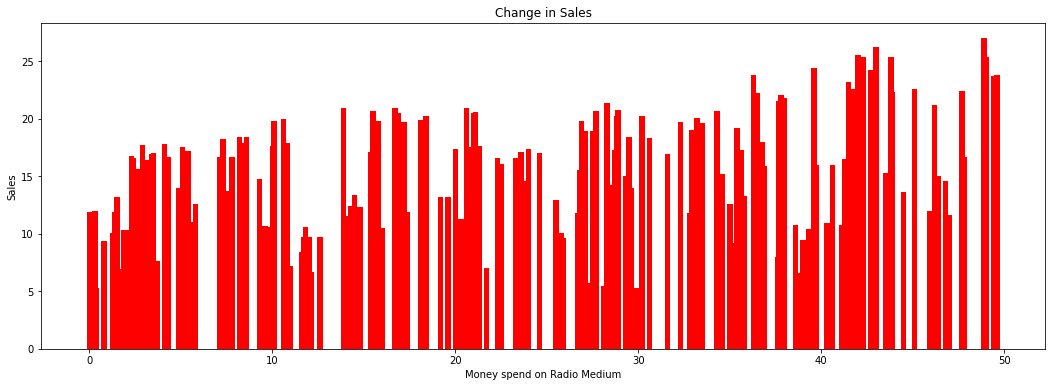

In [122]:
# get the money spend

medium = hp['Radio'].values
# get the sales 
sales = hp['Sales'].values

# Label the axes
plt.xlabel('Money spend on Radio Medium')
plt.ylabel('Sales')

#label the figure
plt.title('Change in Sales')

# create
plt.bar(medium,sales,width=0.3,color=['red'])
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

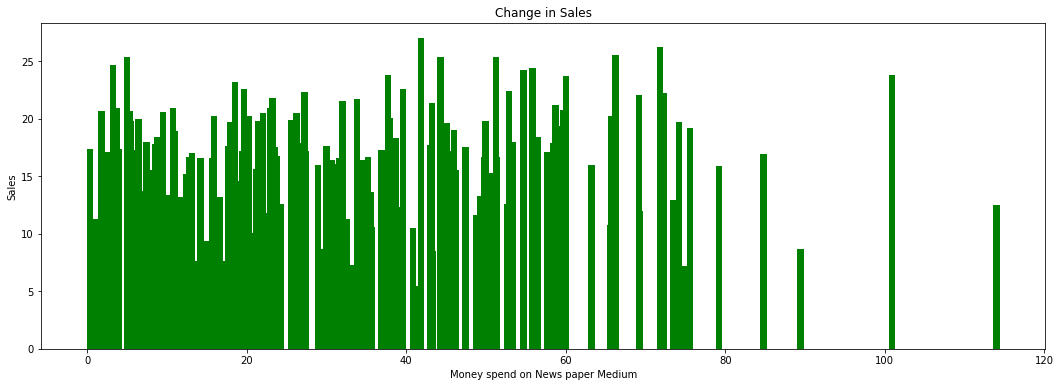

In [123]:
# get the money spend

medium = hp['Newspaper'].values
# get the sales 
sales = hp['Sales'].values

# Label the axes
plt.xlabel('Money spend on News paper Medium')
plt.ylabel('Sales')

#label the figure
plt.title('Change in Sales')

# create
plt.bar(medium,sales,width=0.8,color=['green'])
plt.show()

In [43]:
print("Mean of TV Media = ",hp['TV'].mean())

print("Mean of Radio Media = ",hp['Radio'].mean())

print("Mean of Newspaper Media = ",hp['Newspaper'].mean())

print("Mean of sales = ",hp['Sales'].mean())

Mean of TV Media =  147.0425
Mean of Radio Media =  23.264000000000024
Mean of Newspaper Media =  30.553999999999995
Mean of sales =  15.130500000000005


Text(0.5, 1.0, 'Average money spent on each Platform')

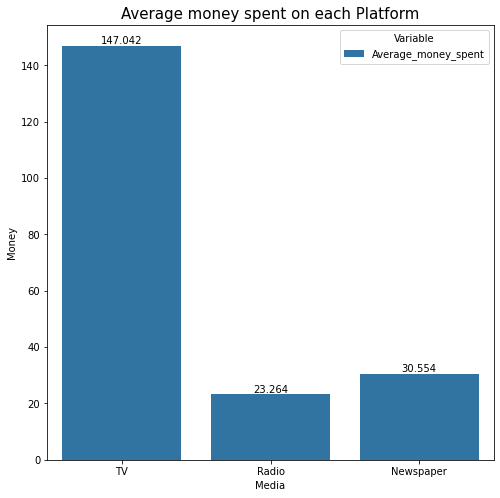

In [131]:
# Average amount of money spent on each platform

hp1 = pd.DataFrame({
    'Media': ['TV', 'Radio','Newspaper'],
    'Average_money_spent': [hp['TV'].mean(), hp['Radio'].mean(),hp['Newspaper'].mean()],
    
})
fig, ax1 = plt.subplots(figsize=(8, 8))
tidy = hp1.melt(id_vars='Media').rename(columns=str.title)
sns.barplot(x='Media', y='Value', hue='Variable', data=tidy, ax=ax1)
ax1.bar_label(ax1.containers[0])
plt.ylabel('Money')
plt.title('Average money spent on each Platform',fontsize=15)

In [39]:
hp['Total money spent on Media'] = hp['TV'] + hp['Radio'] + hp['Newspaper']


In [40]:
hp.head()

,TV,Radio,Newspaper,Sales,Total money spent,Total money spent on Media
0,230.1,37.8,69.2,22.1,337.1,337.1
1,44.5,39.3,45.1,10.4,128.9,128.9
2,17.2,45.9,69.3,12.0,132.4,132.4
3,151.5,41.3,58.5,16.5,251.3,251.3
4,180.8,10.8,58.4,17.9,250.0,250.0


Text(0.5, 1.0, 'Total money spent on Media vs. Sales')

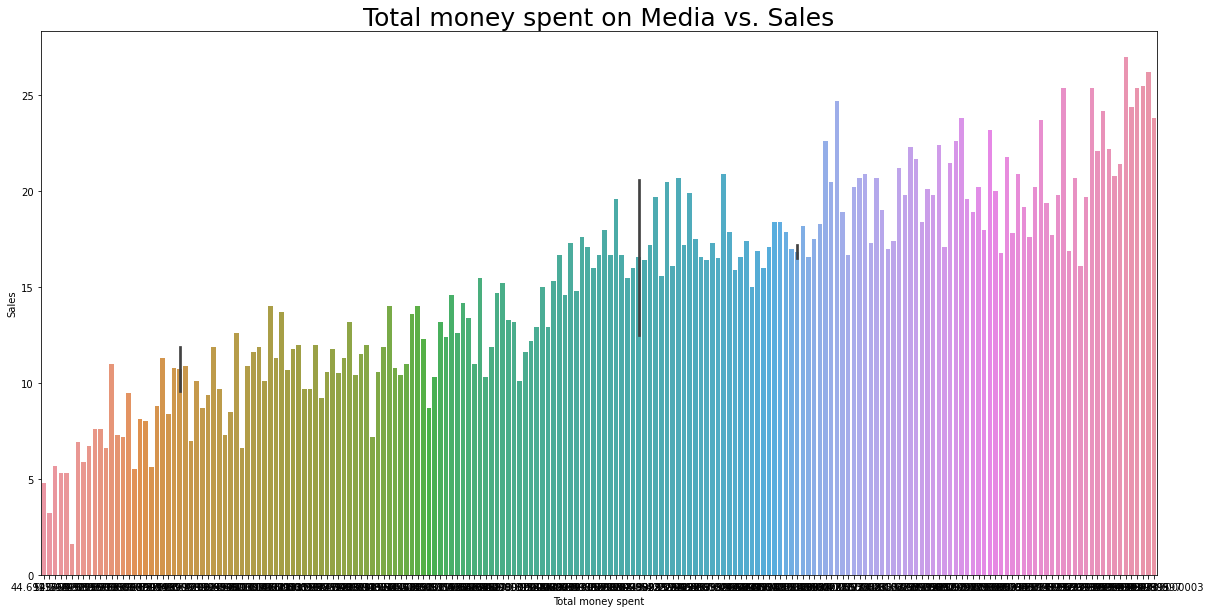

In [41]:
# Barplot for Total money spent on Media vs. Sales
plt.figure(figsize=(20,10))
sns.barplot(x = 'Total money spent', y = 'Sales', data = hp)
plt.title('Total money spent on Media vs. Sales',fontsize=25)

Text(0.5, 1.0, 'Money spent on Media')

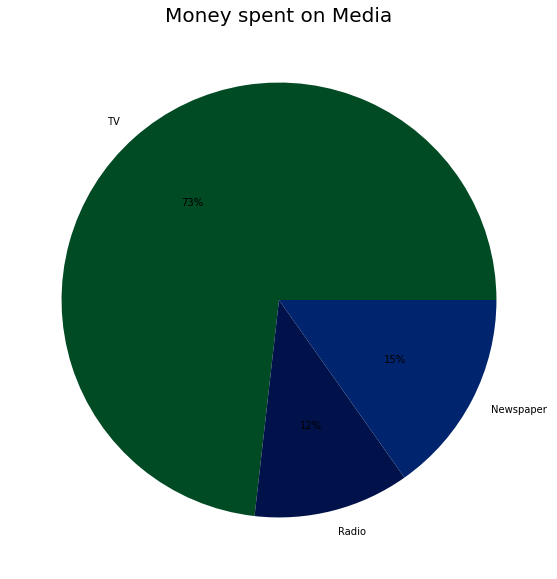

In [18]:
data = [hp['TV'].sum(), hp['Radio'].sum(), hp['Newspaper'].sum()]
labels = ['TV', 'Radio', 'Newspaper']

#define Seaborn color palette to use
colors = sns.color_palette('ocean')[0:5]


plt.figure(figsize=(10,10))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Money spent on Different Media',fontsize=20)

Checking the correlation between variables

In [19]:
corr = hp[['TV','Radio','Newspaper','Sales']].corr()

corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


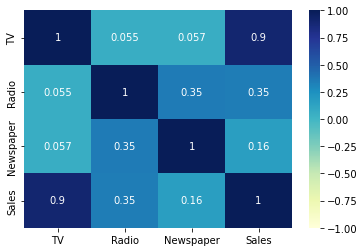

In [20]:
#Visualizing the same in Heatmap()
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, cmap="YlGnBu")
plt.show()

Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(hp.drop(['Sales'],axis=1), 
                                                    hp['Sales'], test_size=0.20, 
                                                    random_state=12)

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
accuracy = model.score(X_test, y_test)
print(accuracy*100,'%')

93.00538016975571 %
